In [1]:
import numpy as np
import yaafelib
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile
from read_labels import read_labels

%matplotlib inline

In [2]:
path = '/home/tracek/Data/StHelena/STHELENA-02_20140605_200000_1_16khz.wav'
sample_start = 3 * 60
sample_len = 60 # seconds
sample_end = sample_start + sample_len
step_size = 512 # no. of samples

In [3]:
rate, signal = wavfile.read(path)
sample = signal[sample_start * rate:(sample_start + sample_len) * rate]

feature_plan = yaafelib.FeaturePlan(sample_rate=rate, normalize=True)
success = feature_plan.loadFeaturePlan('features2.config')
engine = yaafelib.Engine()
engine.load(feature_plan.getDataFlow())
feats = engine.processAudio(sample.reshape(1, -1).astype('float64'))

In [4]:
sheets = read_labels('/home/tracek/Data/StHelena/sthelena_labels.xls')
sheet_selected = sheets['STHELENA-02_20140605_200000_1']
condition = (sheet_selected['Time Start'] > sample_start) & (sheet_selected['Time End'] < sample_end)
sheet_sample = sheet_selected[condition]

In [5]:
print('No. of calls: {}'.format(len(sheet_sample)))
sheet_sample

No. of calls: 5


,Date,File Name,Type of Call,Time Start,Time End,Species,Notes
23,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,184.983,185.629,Storm Petrel,NaN
24,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,195.959,197.250,Storm Petrel,NaN
25,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,218.235,219.849,Storm Petrel,NaN
26,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,229.211,230.502,Storm Petrel,NaN
27,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,231.148,231.794,Storm Petrel,NaN


In [6]:
def plot_feature(feature, start=0, sheet=None):
    cutoff = 5 # to counter edge effects when calculatig derivatives
    feature = feature[cutoff:-cutoff,:]
    x_spacing = np.linspace(sample_start, sample_start+sample_len, len(feature))

    no_figures = feature.shape[1]
    if no_figures == 1:
        plt.figure(figsize=(15,5))
        plt.plot(x_spacing, feature)
        if sheet is not None:
            plot_feature_location(plt, sheet)
    else:
        f, ax = plt.subplots(no_figures, 1, sharex=True, figsize=(15,15))
        for idx in range(no_figures):
            ax[idx].plot(x_spacing, feature[:, idx])
            if sheet is not None:
                plot_feature_location(ax[idx], sheet)

def plot_feature_location(axis, sheet):
    for index, row in sheet.iterrows():
        if row['Species'] == 'Storm Petrel':
            axis.axvspan(xmin=row['Time Start'], xmax=row['Time End'], color='red', alpha=0.1)
        else:
            axis.axvspan(xmin=row['Time Start'], xmax=row['Time End'], color='green', alpha=0.1)

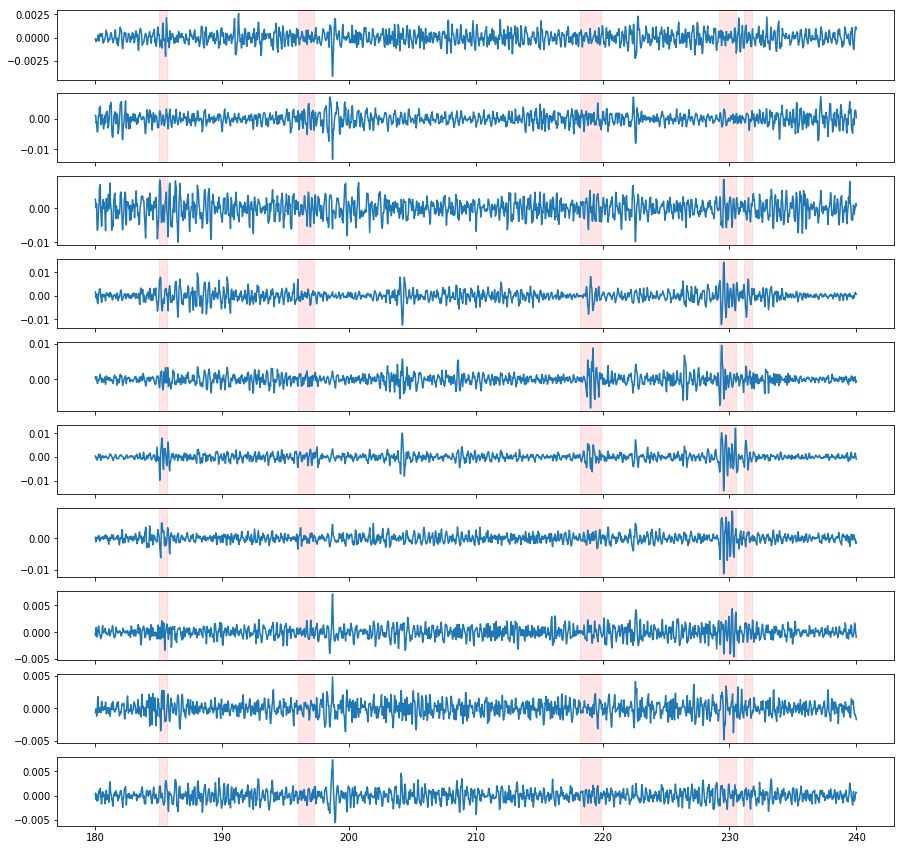

In [7]:
plot_feature(feats['LSF_d2'], start=sample_start, sheet=sheet_sample)

In [8]:
sheet_sample

,Date,File Name,Type of Call,Time Start,Time End,Species,Notes
23,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,184.983,185.629,Storm Petrel,NaN
24,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,195.959,197.250,Storm Petrel,NaN
25,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,218.235,219.849,Storm Petrel,NaN
26,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,229.211,230.502,Storm Petrel,NaN
27,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,231.148,231.794,Storm Petrel,NaN


In [9]:
plt.figure(figsize=(10, 5))
plt.imshow(np.log10(feats[selected_feature].T), aspect='auto')

NameError: name 'selected_feature' is not defined

In [ ]:
feat2 = np.abs(feat[:,1:-1])

In [ ]:
feat3 = feat2.sum(axis=-1)